In [1]:
# import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split,KFold
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import t
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

In [2]:
# Load the data
tensile_df =  pd.read_excel("../Tensile_Properties_Data.xlsx", header=0, skiprows=1)
tensile_df

,Reference,Material,Material Group,C (wt.%),Si (wt.%),Mn (wt.%),P (wt.%),S (wt.%),Ni (wt.%),Cr (wt.%),...,Width (mm),Aspect Ratio (L/W),Aspect Ratio (R/W),Aspect Ratio (T/W),Test Temperature (C),Strain Rate (1/s),Yield Strength (MPa),Ultimate Tensile Strength (MPa),Uniform Elongation (%),Total Elongation (%)
0,1,SS304L,"NSM, Rector Internals",0.02,0.45,1.30,NaN,NaN,8.02,18.30,...,1.2,4.166700,1.1667,0.625000,23.0,0.001000,274.0,789.0,67.00,76.00
1,1,SS304L,"NSM, Rector Internals",0.02,0.45,1.30,NaN,NaN,8.02,18.30,...,0.8,4.437500,0.3750,0.500000,23.0,0.001000,272.0,781.0,69.00,80.00
2,1,FeCrAl,"NSM, Fuel Cladding",NaN,0.13,NaN,NaN,NaN,NaN,13.10,...,1.2,4.166700,1.1667,0.416667,23.0,0.001000,710.0,767.0,7.90,14.80
3,1,FeCrAl,"NSM, Fuel Cladding",NaN,0.13,NaN,NaN,NaN,NaN,13.10,...,0.8,3.187500,0.3750,0.500000,23.0,0.001000,607.0,760.0,10.80,23.10
4,1,FeCrAl,"NSM, Fuel Cladding",NaN,0.13,NaN,NaN,NaN,NaN,13.10,...,0.8,3.187500,0.3750,0.500000,23.0,0.001000,725.0,782.0,6.60,18.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,27,SS316,SS316,0.065,0.31,1.75,0.025,0.0175,13.50,17.00,...,114.0,0.222807,NaN,0.114035,760.0,0.000067,214.0,572.0,59.35,67.66
1469,27,SS316,SS316,0.065,0.31,1.75,0.025,0.0175,13.50,17.00,...,NaN,NaN,NaN,NaN,760.0,0.000067,207.0,494.0,38.80,47.80
1470,27,SS316,SS316,0.065,0.31,1.75,0.025,0.0175,13.50,17.00,...,NaN,NaN,NaN,NaN,760.0,0.003667,101.0,352.0,31.22,47.25
1471,27,SS316,SS316,0.065,0.31,1.75,0.025,0.0175,13.50,17.00,...,25.0,2.032000,NaN,0.000000,760.0,0.000067,177.0,497.0,40.40,46.50


In [3]:
# Check the data information for each column.
tensile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reference                        1473 non-null   int64  
 1   Material                         1473 non-null   object 
 2   Material Group                   1473 non-null   object 
 3   C (wt.%)                         1210 non-null   object 
 4   Si (wt.%)                        1174 non-null   float64
 5   Mn (wt.%)                        1179 non-null   float64
 6   P (wt.%)                         1157 non-null   float64
 7   S (wt.%)                         965 non-null    float64
 8   Ni (wt.%)                        1387 non-null   float64
 9   Cr (wt.%)                        1404 non-null   float64
 10  Mo (wt.%)                        1331 non-null   float64
 11  Al (wt.%)                        484 non-null    float64
 12  N (wt.%)            

In [4]:
# Select the composition columns
compostion_cols = tensile_df.columns[3:29]
compostion_cols

Index(['C (wt.%)', 'Si (wt.%)', 'Mn (wt.%)', 'P (wt.%)', 'S (wt.%)',
       'Ni (wt.%)', 'Cr (wt.%)', 'Mo (wt.%)', 'Al (wt.%)', 'N (wt.%)',
       'Ti (wt.%)', 'Fe (wt.%)', 'Nb (wt.%)', 'B (wt.%)', 'Cu (wt.%)',
       'V (wt.%)', 'Mg (wt.%)', 'Y (wt.%)', 'Zr (wt.%)', 'Zn (wt.%)',
       'W (wt.%)', 'Sn (wt.%)', 'Co (wt.%)', 'O (wt.,%)', 'Ta (wt.%)',
       'H (wt.%)'],
      dtype='object')

In [5]:
# Drop the composition columns
tensile_df = tensile_df.drop(columns=compostion_cols)

In [6]:
# Drop other columns that are not needed
tensile_df = tensile_df.drop(columns=['Irradiation Temperature (C)',
                'Post Treatment Time (h)', 'Cooling', 'Microstructure', 'Irradiation Time (h)', 'Fillet Radius (mm)',
                'Manufacturing', 'Grain size (um)', 'Aspect Ratio (L/W)', 'Aspect Ratio (R/W)'])

In [7]:
# value counts for which the Material Group is SS316
tensile_df[(tensile_df['Material Group'] == 'SS316') & (tensile_df['Specimen Size'] == 'Sub-sized')]

,Reference,Material,Material Group,Treatment,Treatment – Three Categories,Post Treatment Temperature (C),Irradiation Dose (mdpa),Specimen Size Type,Specimen Size,Specimen Shape,Gauge Length (mm),Thickness (mm),Width (mm),Aspect Ratio (T/W),Test Temperature (C),Strain Rate (1/s),Yield Strength (MPa),Ultimate Tensile Strength (MPa),Uniform Elongation (%),Total Elongation (%)
21,3,SS316L,SS316,heat treated-annealed,Solution Annealed,1050.0,NaN,SS-3,Sub-sized,Flat,7.62,0.76,1.52,0.500000,23.0,0.00100,260.385757,616.647771,78.518166,92.056198
22,3,SS316L,SS316,heat treated-annealed,Solution Annealed,1050.0,NaN,SS-J3,Sub-sized,Flat,5.00,0.75,1.20,0.625000,23.0,0.00100,245.697329,606.767440,70.066409,87.183259
23,3,SS316L,SS316,Heat treated-annealed,Heat Treatment,1050.0,NaN,SS-1,Sub-sized,Flat,20.32,0.76,1.52,0.500000,23.0,0.00100,264.391691,624.060995,67.249157,74.719795
25,3,SS316L,SS316,heat treated-annealed,Solution Annealed,1050.0,NaN,SS-2,Sub-sized,Flat,12.70,0.25,1.12,0.223214,23.0,0.00100,249.206796,593.210114,61.002206,63.883752
27,3,SS316L,SS316,heat treated-annealed,Solution Annealed,1050.0,NaN,SS-Mini,Sub-sized,Flat,2.30,0.25,0.40,0.625000,23.0,0.00100,228.338279,561.093512,56.102636,56.037698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,21,SS316-C,SS316,Solution Annealed,Solution Annealed,NaN,NaN,NaN,Sub-sized,Flat,15.00,0.15,4.00,0.037500,23.0,0.00045,NaN,NaN,NaN,38.118539
986,21,SS316-C,SS316,Solution Annealed,Solution Annealed,NaN,NaN,NaN,Sub-sized,Flat,15.00,0.15,4.00,0.037500,23.0,0.00045,NaN,NaN,NaN,40.944016
987,21,SS316-C,SS316,Solution Annealed,Solution Annealed,NaN,NaN,NaN,Sub-sized,Flat,15.00,0.15,4.00,0.037500,23.0,0.00045,NaN,NaN,NaN,27.765197
988,21,SS316-C,SS316,Solution Annealed,Solution Annealed,NaN,NaN,NaN,Sub-sized,Flat,15.00,0.15,4.00,0.037500,23.0,0.00045,NaN,NaN,NaN,27.650701


In [8]:
# Create a new dataframe with only SS316 material
filtered_df = tensile_df[tensile_df['Material Group'] == 'SS316']
filtered_df


,Reference,Material,Material Group,Treatment,Treatment – Three Categories,Post Treatment Temperature (C),Irradiation Dose (mdpa),Specimen Size Type,Specimen Size,Specimen Shape,Gauge Length (mm),Thickness (mm),Width (mm),Aspect Ratio (T/W),Test Temperature (C),Strain Rate (1/s),Yield Strength (MPa),Ultimate Tensile Strength (MPa),Uniform Elongation (%),Total Elongation (%)
21,3,SS316L,SS316,heat treated-annealed,Solution Annealed,1050.0,NaN,SS-3,Sub-sized,Flat,7.62,0.76,1.52,0.500000,23.0,0.001000,260.385757,616.647771,78.518166,92.056198
22,3,SS316L,SS316,heat treated-annealed,Solution Annealed,1050.0,NaN,SS-J3,Sub-sized,Flat,5.00,0.75,1.20,0.625000,23.0,0.001000,245.697329,606.767440,70.066409,87.183259
23,3,SS316L,SS316,Heat treated-annealed,Heat Treatment,1050.0,NaN,SS-1,Sub-sized,Flat,20.32,0.76,1.52,0.500000,23.0,0.001000,264.391691,624.060995,67.249157,74.719795
25,3,SS316L,SS316,heat treated-annealed,Solution Annealed,1050.0,NaN,SS-2,Sub-sized,Flat,12.70,0.25,1.12,0.223214,23.0,0.001000,249.206796,593.210114,61.002206,63.883752
27,3,SS316L,SS316,heat treated-annealed,Solution Annealed,1050.0,NaN,SS-Mini,Sub-sized,Flat,2.30,0.25,0.40,0.625000,23.0,0.001000,228.338279,561.093512,56.102636,56.037698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,27,SS316,SS316,Reannealed,Solution Annealed,NaN,NaN,NaN,Standard,Round,25.40,13.00,114.00,0.114035,760.0,0.000067,214.000000,572.000000,59.350000,67.660000
1469,27,SS316,SS316,Mill-Annealed,Solution Annealed,NaN,NaN,NaN,Standard,Round,50.80,51.00,NaN,NaN,760.0,0.000067,207.000000,494.000000,38.800000,47.800000
1470,27,SS316,SS316,Reannealed,Solution Annealed,NaN,NaN,NaN,Standard,Round,50.80,16.00,NaN,NaN,760.0,0.003667,101.000000,352.000000,31.220000,47.250000
1471,27,SS316,SS316,Mill-Annealed,Solution Annealed,NaN,NaN,NaN,Standard,Round,50.80,NaN,25.00,0.000000,760.0,0.000067,177.000000,497.000000,40.400000,46.500000


In [9]:
# Create new column called Specimen Area
# if tensile_df['Specimen Shape'] == 'Flat', Specimen Area = Width (mm) x Thickness (mm)
# if tensile_df['Specimen Shape'] == 'Round', Specimen Area = pi x (Thickness/2)**2

import math

def calculate_area(row):
    if row['Specimen Shape'] == 'Flat':
        return row['Width (mm)'] * row['Thickness (mm)']
    elif row['Specimen Shape'] == 'Round':
        return math.pi * (row['Thickness (mm)'] / 2) ** 2
    else:
        return np.nan  # In case there is a shape that doesn't match 'Flat' or 'Round'

# Apply the function to each row in the DataFrame and create the new column
filtered_df['Specimen Area'] = filtered_df.apply(calculate_area, axis=1)

C:\Users\LZ\AppData\Local\Temp\ipykernel_6792\2449772336.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Specimen Area'] = filtered_df.apply(calculate_area, axis=1)


In [10]:
# Create new column called Slenderness Ratio
# Slenderness Ratio = Gauge Length (mm) / sqrt(Specimen Area)
filtered_df['Slenderness Ratio'] = filtered_df['Gauge Length (mm)'] / np.sqrt(filtered_df['Specimen Area'])
filtered_df = filtered_df[filtered_df['Slenderness Ratio'] < 50]

C:\Users\LZ\AppData\Local\Temp\ipykernel_6792\917180701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Slenderness Ratio'] = filtered_df['Gauge Length (mm)'] / np.sqrt(filtered_df['Specimen Area'])


In [11]:
# Reduce the column to two decimal places
filtered_df['Slenderness Ratio'] = filtered_df['Slenderness Ratio'].round(2)
filtered_df['Inverse Slenderness Ratio'] = (np.sqrt(filtered_df['Specimen Area']) / filtered_df['Gauge Length (mm)']).round(2)

C:\Users\LZ\AppData\Local\Temp\ipykernel_6792\3409496553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Slenderness Ratio'] = filtered_df['Slenderness Ratio'].round(2)
C:\Users\LZ\AppData\Local\Temp\ipykernel_6792\3409496553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Inverse Slenderness Ratio'] = (np.sqrt(filtered_df['Specimen Area']) / filtered_df['Gauge Length (mm)']).round(2)


In [12]:
# rename the Treatment - Three Categories column as Treatment colum
filtered_df= filtered_df[(filtered_df['Treatment – Three Categories'] == 'Solution Annealed')
                         &(filtered_df['Specimen Size']=='Sub-sized')]

#remove nan values
filtered_df = filtered_df.dropna(subset=['Inverse Slenderness Ratio', 'Total Elongation (%)'])

# Barba's Law with entire data to fit

Linear Regression Function: y = 233.5536x + 34.1821


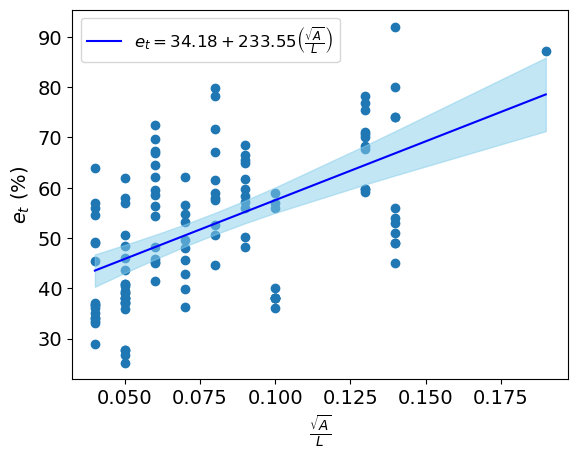

In [13]:
# Create scatter plots with linear regression lines and confidence intervals in the legend
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Example data
data = filtered_df.reset_index(drop=True)
x = data['Inverse Slenderness Ratio']
y =  data['Total Elongation (%)']

# Add a constant (bias term) to the model
X = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Extract the coefficients
intercept, slope = results.params
print(f"Linear Regression Function: y = {slope:.4f}x + {intercept:.4f}")

# Get the predicted values and the confidence intervals
predictions = results.get_prediction(X)
mean = predictions.predicted_mean
conf_int = predictions.conf_int()

# Sorting the values for proper plotting
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
mean_sorted = mean[sorted_indices]
conf_int_sorted = conf_int[sorted_indices]

# Plotting the scatter plot
plt.scatter(x, y)

# Plotting the regression line
plt.plot(x_sorted, mean_sorted, color='blue',
         label=fr'$e_t ={intercept:.2f} + {slope:.2f} \left(\frac{{\sqrt{{A}}}}{{L}}\right)$')


# Plotting the 95% confidence interval
plt.fill_between(x_sorted, conf_int_sorted[:, 0], conf_int_sorted[:, 1],  alpha =0.5, color='skyblue')

# Adding labels and title
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize = 12, loc = 'upper left')
plt.ylabel(r'$e_t$ (%)', fontsize=14)

plt.xlabel(r'$\frac{\sqrt{A}}{L}$', fontsize =14)
plt.show()


# Oliver's Formula fit with entire data

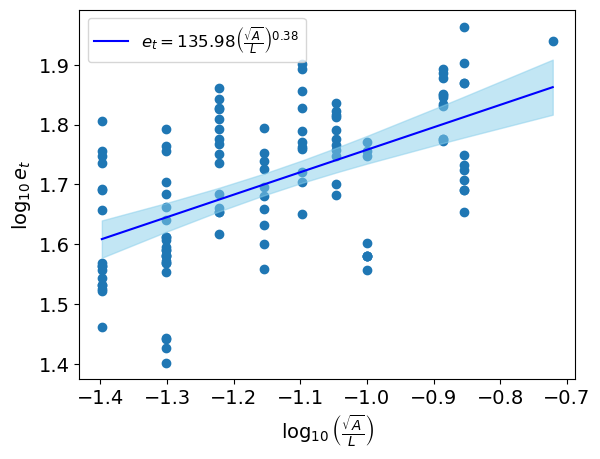

In [14]:

# Create scatter plots with linear regression lines and confidence intervals in the legend
import math
# Linear regression
x = np.log10(data['Inverse Slenderness Ratio'])
y = np.log10(data['Total Elongation (%)'])

X = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Extract the coefficients
intercept, slope = results.params


# Get the predicted values and the confidence intervals
predictions = results.get_prediction(X)
mean = predictions.predicted_mean
conf_int = predictions.conf_int()

# Sorting the values for proper plotting
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
mean_sorted = mean[sorted_indices]
conf_int_sorted = conf_int[sorted_indices]


specific_elong = round(10**(intercept),2)  # Assign the specific elongation value
material_cons = round(slope,2)    # Assign the material constant value

# Plotting the scatter plot
plt.scatter(x, y)

plt.plot(x_sorted, mean_sorted, color='blue',
         label=fr'$e_t = {specific_elong} \left(\frac{{\sqrt{{A}}}}{{L}}\right)^{{{material_cons}}}$',
         )

# Plotting the 95% confidence interval
plt.fill_between(x_sorted, conf_int_sorted[:, 0], conf_int_sorted[:, 1], alpha =0.5, color='skyblue')

plt.legend(fontsize=12 )
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel(r'$\log_{10}e_t$', fontsize=14)

plt.xlabel(r'$\log_{10}\left(\frac{\sqrt{A}}{L}\right)$',fontsize =14)
plt.show()
